In [31]:
from src.function_hofman import NetworkModuleInference
import numpy as np
import torch
import networkx as nx
from src.viz import *
from src.metrics import *
from src.mixturemodel import MixtureModel
from src.metrics import comp_nmi


100%|██████████| 18/18 [01:05<00:00,  3.62s/it]


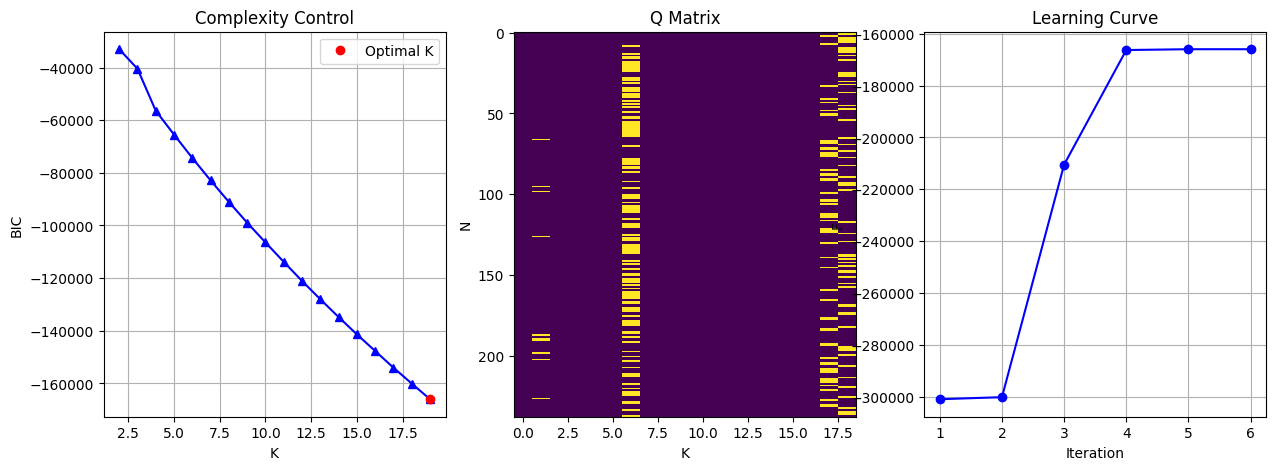

In [89]:
graph = nx.read_gml("../data/sp_school_day_2.gml")
A = nx.to_numpy_array(graph)

opts = {'NUM_RESTARTS': 100, 'VERBOSE': 0}
inference = NetworkModuleInference(A, [i for i in range(2,20)], opts=opts)
best_net, nets_by_K = inference.learn_restart()
inference.plot_results(best_net, nets_by_K)


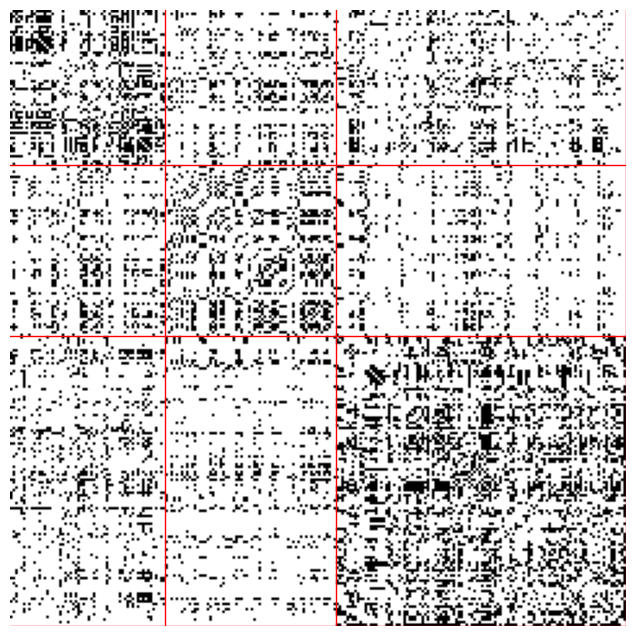

In [98]:
tau = nets_by_K[-8]["Q"]
vizu = MixtureModel(A, A.shape[0], 12)
vizu.plot_preds_adjancy(torch.tensor(tau))

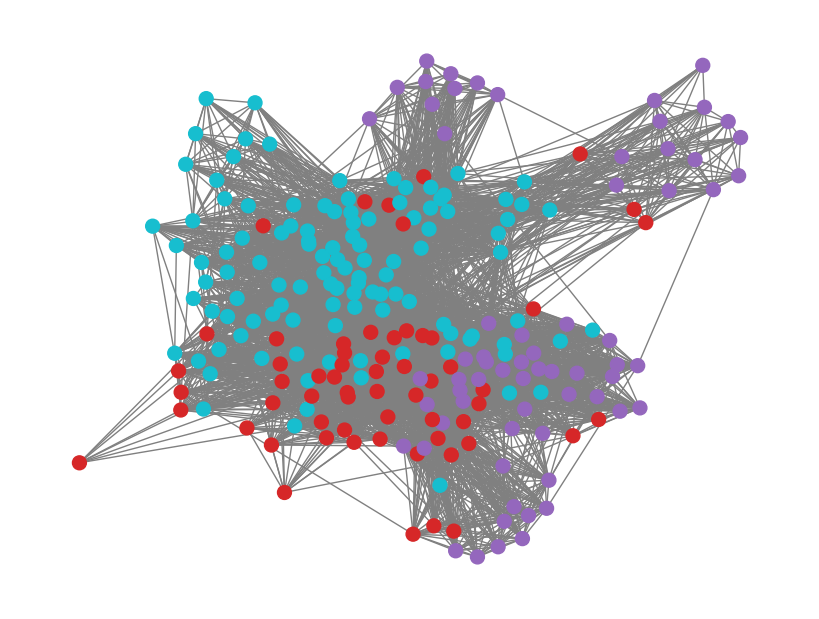

In [99]:
vizu.plot_from_tau(tau)

In [100]:
comp_nmi(graph, torch.tensor(tau))

0.31944356122876927

100%|██████████| 18/18 [00:17<00:00,  1.06it/s]


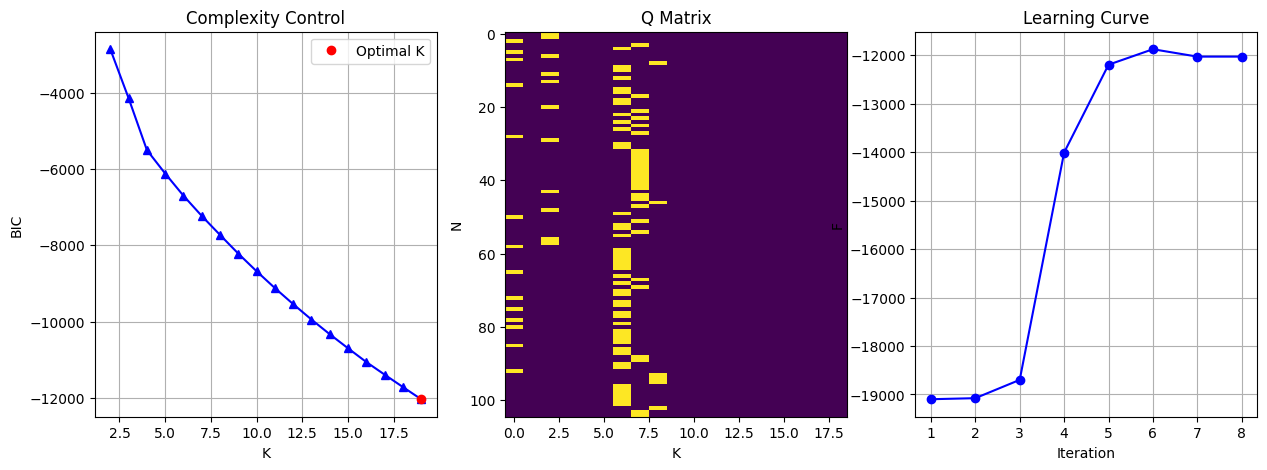

In [37]:
graph = nx.read_gml("../data/polbooks.gml")
A = nx.to_numpy_array(graph)

opts = {'NUM_RESTARTS': 100, 'VERBOSE': 0}
inference = NetworkModuleInference(A, [i for i in range(2,20)], opts=opts)
best_net, nets_by_K = inference.learn_restart()
inference.plot_results(best_net, nets_by_K)


In [84]:
tau = nets_by_K[-1]["Q"]

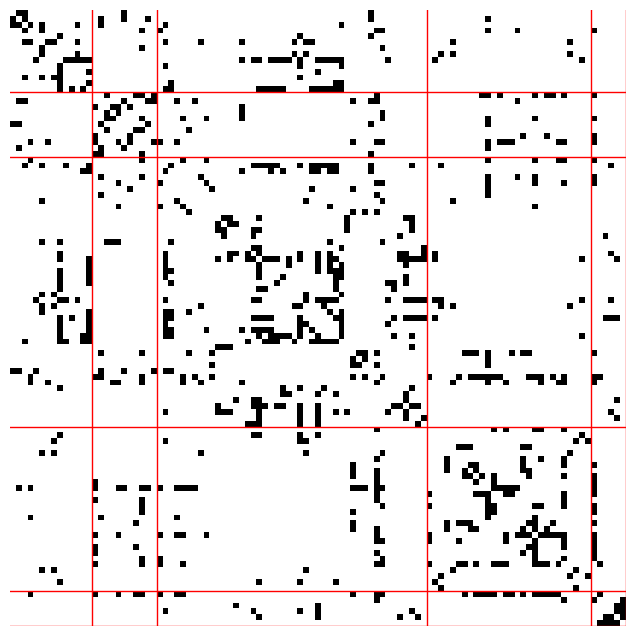

In [85]:
vizu = MixtureModel(A, A.shape[0], 12)
vizu.plot_preds_adjancy(torch.tensor(tau))

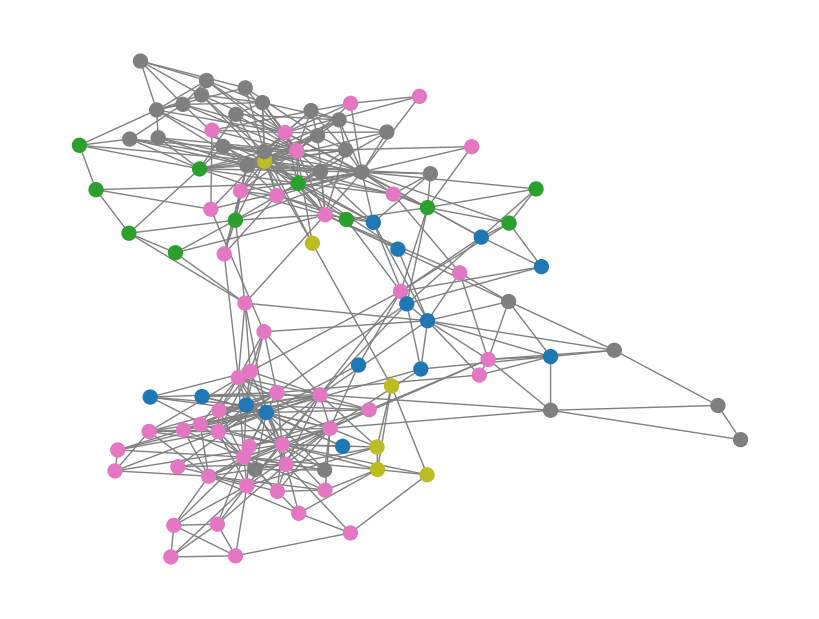

In [86]:
vizu.plot_from_tau(tau, determinist=True)

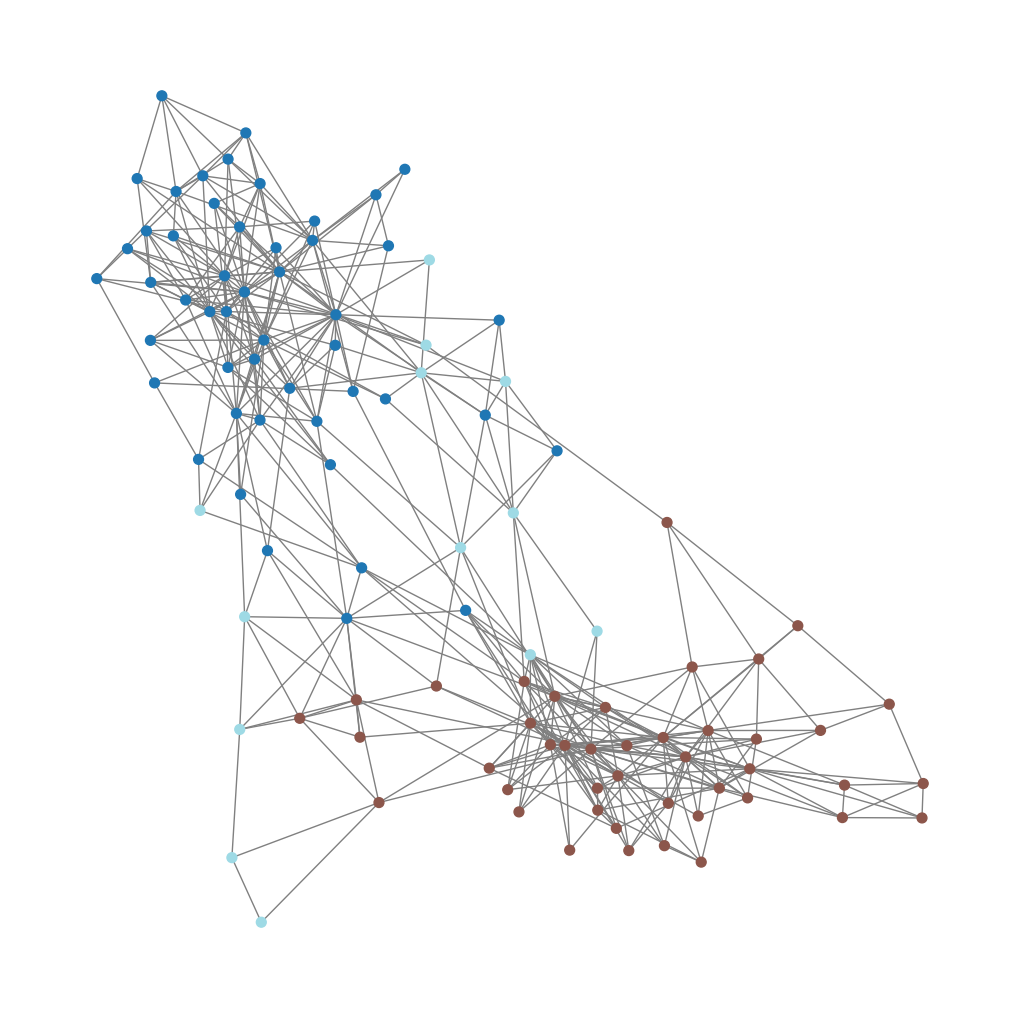

In [87]:
plot_class_graph(graph, "gt")

In [88]:
comp_nmi(graph, torch.tensor(tau))

0.15217955964912708